In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs

In [ ]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [ ]:
x

array([[-6.19031459, -7.32294816],
       [ 5.44659179, -0.35903973],
       [-8.91391505, -5.09348475],
       ...,
       [ 5.55769771, -1.39835642],
       [ 6.23598351, -0.30747004],
       [ 5.61856183,  1.7562449 ]])

In [ ]:
y

array([2, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2,
       0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0,
       1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 2,
       1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1,
       1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 2,
       1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1,
       2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2,
       2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1,

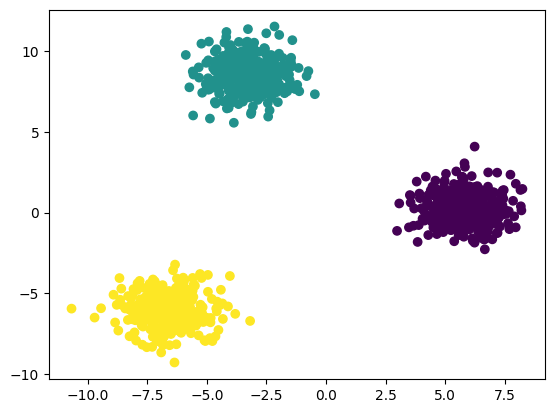

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y)

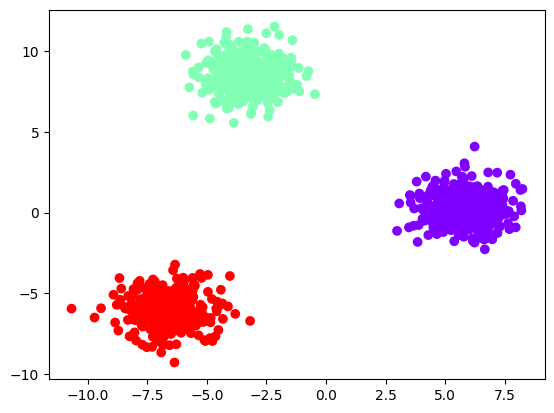

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
WCSS=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    WCSS.append(kmeans.inertia_)


In [ ]:
WCSS

[1399.9999999999968,
 591.9874766871684,
 43.48650327173899,
 38.22222940043591,
 33.01987556435927,
 29.599771306763728,
 25.19057489281068,
 22.656128868910734,
 20.667569855406352,
 17.56484504128676]

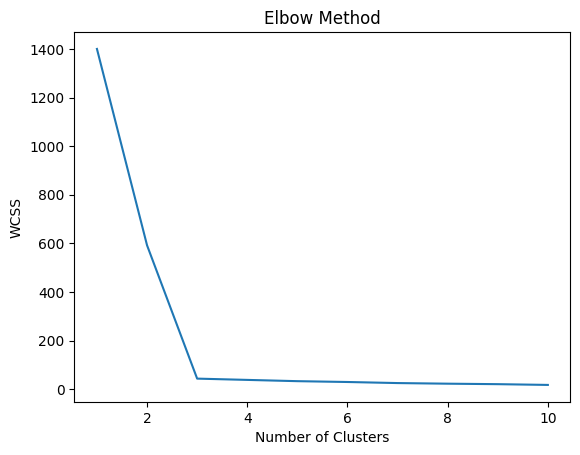

In [ ]:
plt.plot(range(1,11),WCSS)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4,init="k-means++")


In [ ]:
kmeans.fit_predict(x_train_scaled)

array([2, 2, 3, 1, 1, 1, 0, 1, 2, 2, 3, 2, 1, 1, 2, 1, 0, 2, 3, 1, 2, 3,
       1, 1, 1, 1, 3, 2, 1, 1, 1, 3, 2, 1, 2, 2, 0, 3, 2, 2, 3, 2, 0, 2,
       2, 1, 2, 2, 3, 2, 1, 2, 1, 3, 2, 2, 1, 3, 1, 0, 3, 2, 2, 2, 2, 2,
       0, 1, 3, 1, 0, 3, 2, 3, 1, 2, 0, 0, 3, 1, 1, 2, 2, 0, 2, 2, 1, 1,
       1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 3, 0, 3, 1, 1, 2, 2, 2, 3, 0, 3,
       0, 2, 3, 2, 3, 1, 1, 2, 1, 1, 0, 3, 1, 1, 1, 2, 2, 1, 3, 3, 2, 1,
       2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 3, 2, 1, 2, 1, 3, 3, 1, 1,
       2, 0, 0, 1, 3, 2, 1, 2, 2, 1, 1, 1, 3, 0, 3, 0, 2, 2, 2, 1, 0, 2,
       0, 2, 3, 2, 2, 2, 2, 3, 3, 2, 1, 2, 3, 1, 1, 3, 0, 1, 2, 2, 0, 1,
       0, 0, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1, 3, 0, 2, 1, 3, 2, 1, 2,
       1, 1, 3, 3, 1, 0, 0, 1, 2, 3, 2, 2, 0, 1, 2, 2, 2, 3, 2, 1, 0, 3,
       1, 1, 3, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 3, 1, 0, 1, 3, 1, 3,
       1, 1, 0, 3, 1, 3, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 3, 1,
       1, 0, 1, 3, 1, 2, 2, 1, 3, 1, 2, 2, 1, 2, 1,

In [ ]:
y_pred = kmeans.predict(x_test_scaled)

In [ ]:
y_pred

array([1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 3, 2, 3, 1, 3, 0, 3, 0, 3, 1, 3,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 1, 1, 2, 3, 2, 1, 3, 0,
       2, 2, 1, 3, 2, 3, 0, 1, 1, 2, 3, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       3, 3, 0, 1, 0, 1, 2, 2, 0, 2, 3, 3, 1, 0, 0, 0, 3, 3, 2, 3, 0, 2,
       2, 1, 0, 1, 1, 2, 0, 2, 3, 2, 2, 1, 1, 2, 2, 0, 3, 1, 3, 0, 2, 1,
       1, 2, 2, 1, 3, 1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 3, 1,
       2, 1, 0, 1, 2, 1, 1, 1, 3, 3, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1,
       3, 1, 2, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 3,
       1, 0, 2, 0, 3, 3, 3, 1, 1, 0, 3, 3, 3, 2, 3, 2, 1, 0, 0, 3, 0, 1,
       0, 0, 3, 0, 1, 0, 1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2,
       0, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2, 2, 3, 1, 1, 1, 3, 3, 3, 2, 1, 2,
       1, 3, 3, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 2, 0, 2, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 3, 1, 1, 2, 2, 3, 1, 0, 2, 2, 3, 1, 0, 2,
       1, 0, 3, 3, 2, 0, 2, 1, 2, 3, 0, 2, 1, 0], d

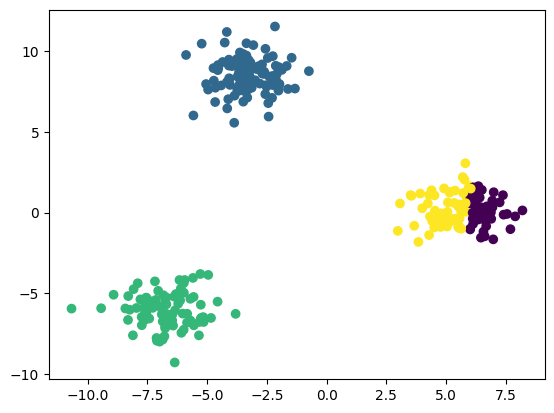

In [ ]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1,11),WCSS,curve="convex",direction="decreasing")

In [ ]:
kl.elbow

np.int64(3)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

[np.float64(0.6291087415668966),
 np.float64(0.8608651724189232),
 np.float64(0.6723480169671344),
 np.float64(0.49909378903438095),
 np.float64(0.32862518567023563),
 np.float64(0.3414559725913082),
 np.float64(0.32160729885716777),
 np.float64(0.3412252882075738),
 np.float64(0.3316989683694067)]

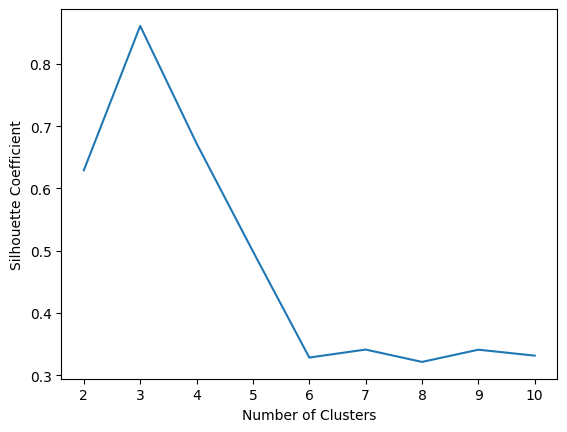

In [ ]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()